## Final Project Submission

Please fill out:
* Student name: Carolann Moore
* Student pace: full time
* Scheduled project review date/time: Friday, October 4.
* Instructor name: Howard
* Blog post URL:


## King County Housing Data

Below we'll be working with the King County housing data, which is in the Seattle, Washington area. The data was collected using houses sold in 2014 and 2015. Some of the data is missing, and some of it has been manipulated in order to make the assignment more challenging for us.

## First things first! 
#### Let's import our data and libraries that we will be using!

We're also going to take this time to pull the top 20 rows of data to get a glimpse of what we're working with.

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from pandas.tools.plotting import scatter_matrix
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import date
from datetime import datetime
import statsmodels.api as sm
import statistics

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model

sns.set_style('darkgrid')
sns.set_palette('husl')

df = pd.read_csv('kc_house_data.csv')

df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Let's see what all of those columns look like at a glance:

In [107]:
print('*******Shape of data frame:*******')
print()
print(df.shape)
print()
print()
print('*******Data frame info at a glance:*******')
print()
df.info()

*******Shape of data frame:*******

(21597, 21)


*******Data frame info at a glance:*******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21

Let's see all of the data for the columns aggreagted in different ways.

In [108]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Before we go any further, let's look at what all these columns even mean:

* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Do we have any missing data?

Let's find out!

In [109]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Looks like it! Let's see how we can fix that.

## Fill in Missing Data

With only 63 missing data points missing in the 'view' column, it's not going to mess up our data to input those missing values as our mode value, which is 0.

In [110]:
df['view'] = df['view'].fillna(0.0)

For our waterfront houses, we're also going to put that as our mode, which is 0.

In [111]:
df['waterfront'] = df['waterfront'].fillna(0.0)

Last, let's deal with the 'yr_renovated column. We're going put this as a dummy value, 1.0. This will indicate to us quickly that is separate from our not renovated value (0.0) and is also not apart of the year that it was renovated. We'll know at a glance that these homes may have been renovated, and will need further investigation.

In [112]:
df['yr_renovated'] = df['yr_renovated'].fillna(1.0)

Let's see if that fixed the missing data issue:

In [113]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Perfect!

Now I'm going to delete our ID column. Why? We don't need it.

In [114]:
# delete columns that won't be useful
df = df.drop('id', axis=1)

## Data Clean Up

Onto other clean up! When we briefly looked over the top of our data, we can see that there's at least some values in our sqft_basement column that show as a question mark. Let's replace those to the mode of 0. If there is a discrepency, we'll be able to tell from the sqft_above and sqft_living columns.

In [115]:
#change question marks in sqft_basement column to a number. Will separate those out
df['sqft_basement'] = df.sqft_basement.replace('?', 1.0)

In [116]:
# Considered deleting sqft_living, but due to this error, I want to be able to go back and fix the basement issue
# before deleting the column.

In [117]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1,1995,0.0,98003,47.3097,-122.327,2238,6819
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Perfect! Now we can see that that worked, as indicated by the 1 in row 6.

When we looked at our df.info() above, we could see that there was a whole mess of data types. Let's try to standardize that.

First, let's separate all of our columns into numerical and categorical features.

## Categorical vs Numerical Data Features

### Categorical Data Features
- date
- waterfront
- condition
- grade
- yr_built
- yr_renovated
- zipcode
- lat
- long

### Numerical Data Features
- price
- bedrooms
- bathrooms
- view
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15

Now that we've got that covered, let's standardize. House prices aren't going to include cents, so let's change that to an int value.

In [118]:
df['price'] = df.price.astype('int')

Same goes for view.

In [14]:
df['view'] = df.view.astype('int')

To standardize all sqft values, we have to change sqft_basement to an int. This takes a couple of steps because of our pesky question marks.

In [15]:
#first have to change sqft_basement to a numeric value
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [16]:
#Then we can change it to an int!
df['sqft_basement'] = df.sqft_basement.astype('int')

Now let's change our categorical data points to be objects since the numbers they are assigned to don't equate to a numeric value. For example you can't add a 6 grade home and a 4 grade home and suddenly you have one 10 grade home.

In [17]:
df['waterfront'] = df.waterfront.astype('object')
df['yr_renovated'] = df.yr_renovated.astype('object')
df['date'] = df.date.astype('object')
df['condition'] = df.condition.astype('object')
df['grade'] = df.grade.astype('object')
df['yr_built'] = df.yr_built.astype('object')
df['lat'] = df.lat.astype('object')
df['long'] = df.long.astype('object')
df['zipcode'] = df.zipcode.astype('object')

Finally, let's change our date to be datatime.

In [18]:
df['date'] = pd.to_datetime(df['date'])

Let's see if it did what we wanted:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null object
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null object
long             21597 non-null object
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(8)
memory usage: 3.3+ MB


Voila! That's much better.

** Just as a note, we left bathrooms as a float because half baths and such do exist.
There are also some half values in floors, and my assumption is those are houses with split levels, so I left them as well.

## Let's play with data!

First I'm going to creat a separate data frame for numerical and categorical data.

In [20]:
df_num = df[['price', 'bedrooms', 'bathrooms', 'view', 'floors', 'sqft_living', 
                  'sqft_above', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
df_cat = df[['date', 'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]

In [21]:
df_num.head()

,price,bedrooms,bathrooms,view,floors,sqft_living,sqft_above,sqft_lot,sqft_basement,sqft_living15,sqft_lot15
0,221900,3,1.00,0,1.0,1180,1180,5650,0,1340,5650
1,538000,3,2.25,0,2.0,2570,2170,7242,400,1690,7639
2,180000,2,1.00,0,1.0,770,770,10000,0,2720,8062
3,604000,4,3.00,0,1.0,1960,1050,5000,910,1360,5000
4,510000,3,2.00,0,1.0,1680,1680,8080,0,1800,7503


In [22]:
df_cat.head()

,date,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,2014-10-13,0,3,7,1955,0,98178,47.5112,-122.257
1,2014-12-09,0,3,7,1951,1991,98125,47.721,-122.319
2,2015-02-25,0,3,6,1933,1,98028,47.7379,-122.233
3,2014-12-09,0,5,7,1965,0,98136,47.5208,-122.393
4,2015-02-18,0,3,8,1987,0,98074,47.6168,-122.045


In [23]:
df.groupby('grade').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
grade,,,,,,,,,,,
3,2.620000e+05,1.000000,0.750000,520.000000,12981.000000,1.000000,0.000000,520.000000,0.000000,1340.000000,12233.000000
4,2.120019e+05,1.592593,0.907407,680.740741,15614.777778,1.037037,0.148148,673.333333,7.407407,1486.666667,12896.629630
5,2.485240e+05,2.388430,1.113636,983.326446,24019.909091,1.086777,0.136364,944.607438,38.747934,1380.570248,16122.433884
6,3.019166e+05,2.685967,1.243499,1191.561335,12646.953876,1.108685,0.092738,1068.647694,121.000491,1389.247301,11020.924926
7,4.025946e+05,3.258079,1.829953,1689.514932,11769.877089,1.296802,0.099621,1408.425006,275.380767,1679.280254,10615.995988
8,5.429868e+05,3.481616,2.348928,2184.803627,13514.009068,1.667848,0.246167,1867.309810,310.736686,2067.075845,11371.257049
9,7.737382e+05,3.773231,2.664340,2868.139962,20638.515488,1.849140,0.427151,2554.395411,306.956023,2613.460038,17401.707839
10,1.072347e+06,3.907407,3.006393,3520.299824,28191.063492,1.892857,0.648148,3112.086420,398.788360,3036.892416,21334.663139
11,1.497792e+06,4.160401,3.501880,4395.448622,38372.789474,1.961153,1.015038,3853.182957,530.330827,3532.110276,27743.160401


In [24]:
df.groupby('condition').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
condition,,,,,,,,,,,
1,341067.241379,2.551724,1.215517,1247.931034,22174.379310,1.155172,0.310345,1173.793103,74.172414,1808.965517,9495.068966
2,328178.758824,2.858824,1.460294,1420.823529,32706.458824,1.158824,0.076471,1252.411765,161.494118,1585.511765,19610.211765
3,542173.057347,3.376748,2.223680,2149.205492,14746.596362,1.620150,0.212411,1906.793153,238.479387,2043.880385,12498.973823
4,521374.450414,3.357936,1.901092,1951.408843,16020.618813,1.261230,0.261934,1591.044037,351.257883,1901.293641,13701.205038
5,612577.742504,3.460317,2.024397,2022.911229,13052.582011,1.271605,0.322751,1537.788948,472.603175,1842.560259,11119.460317


In [25]:
df.groupby('grade').count()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
grade,,,,,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
5,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
6,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038
7,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974
8,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065
9,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615,2615
10,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134
11,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399


In [26]:
df.groupby('condition').count()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,,,,,,
1,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
3,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020,14020
4,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677,5677
5,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701,1701


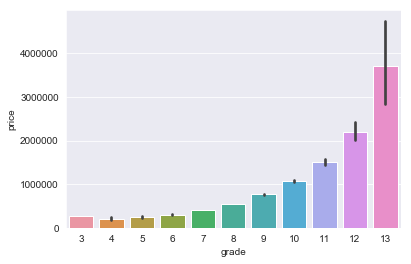

In [27]:
sns.barplot(x=df['grade'], y=df['price'])

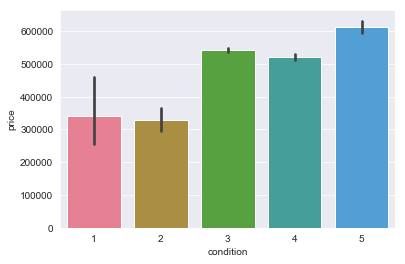

In [28]:
sns.barplot(x=df['condition'], y=df['price'])

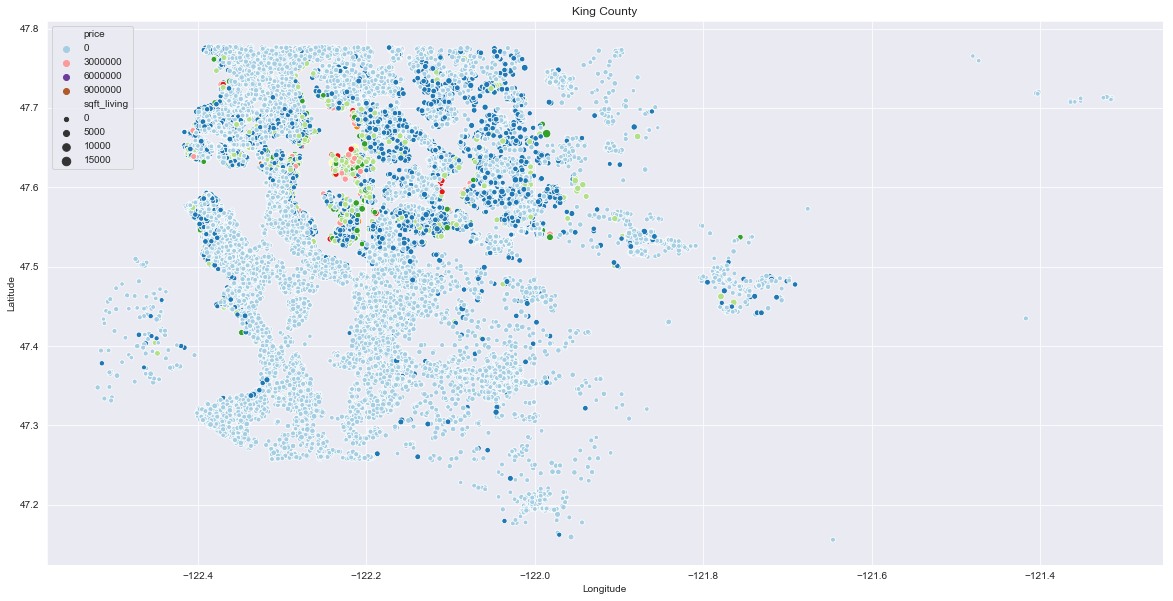

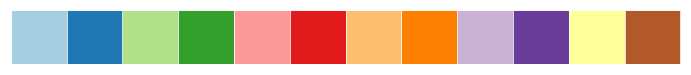

In [155]:
plt.figure(figsize= (20, 10))
x = df[['long']]
y = df[['lat']]


sns.scatterplot(x=df.long, y=df.lat, hue=df.price,  palette='Paired', legend='brief', size=df.sqft_living)
plt.title('King County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show

sns.palplot(sns.color_palette("Paired"))

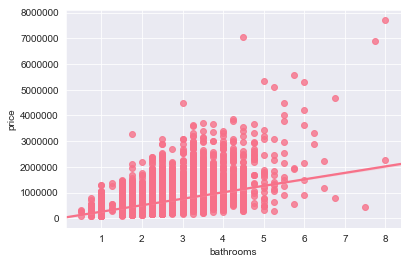

In [30]:
sns.regplot(x=df['bathrooms'], y=df['price'])

### Yikes, maybe skip this next one...that's an eye-full!

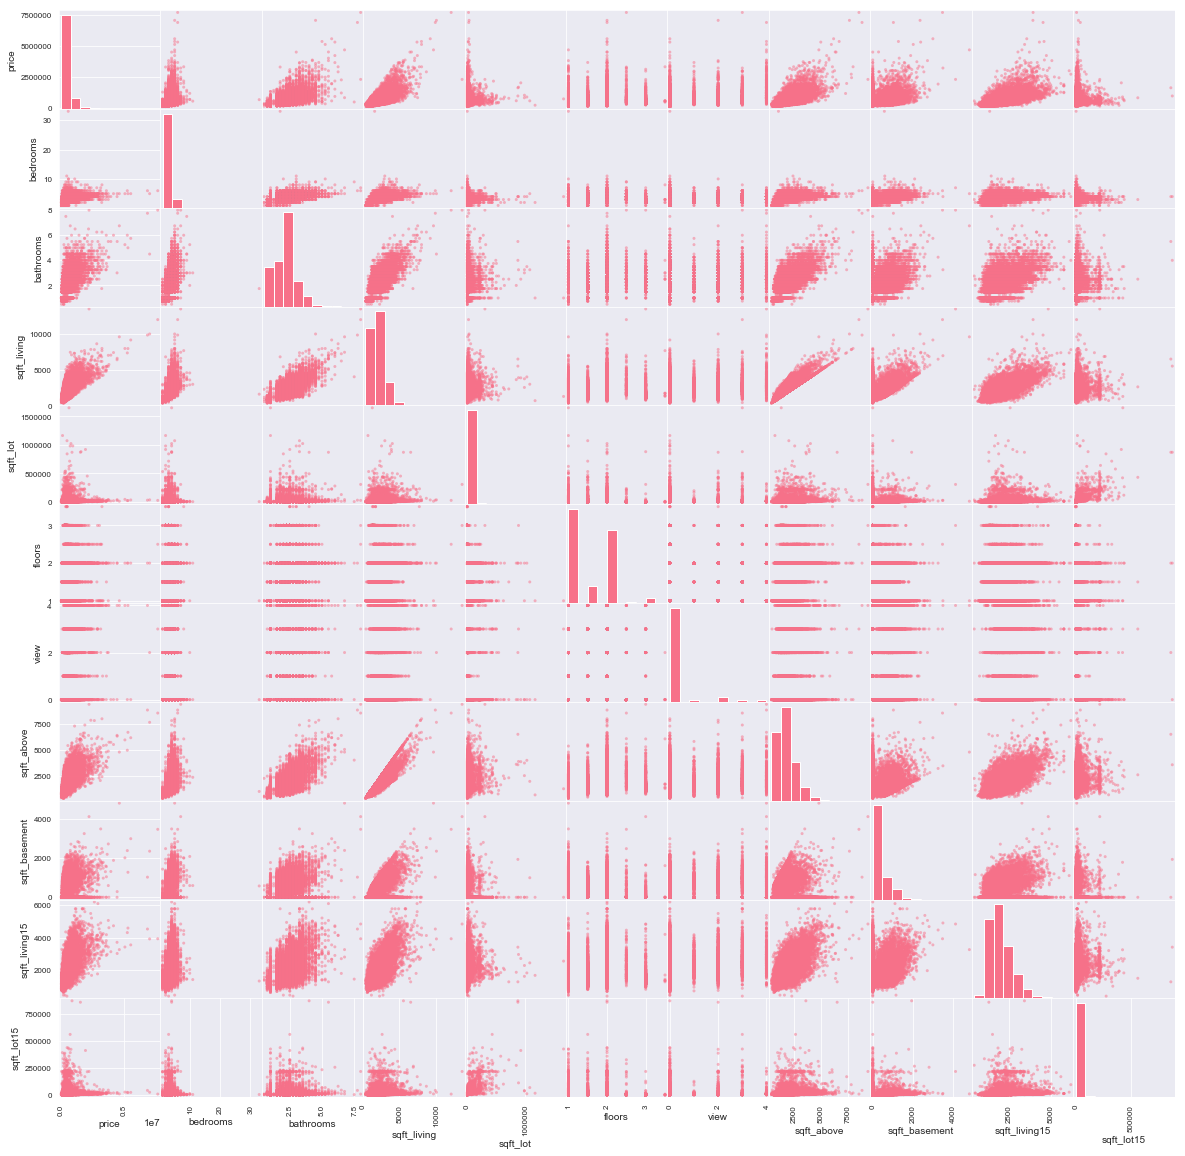

In [31]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

### Let's split all of that up so it's more manageable.

In [32]:
col1 = ['floors', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'price']
col2 = ['condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_above', 'price']
col3 = ['lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode', 'price']
latlong = ['lat', 'long']

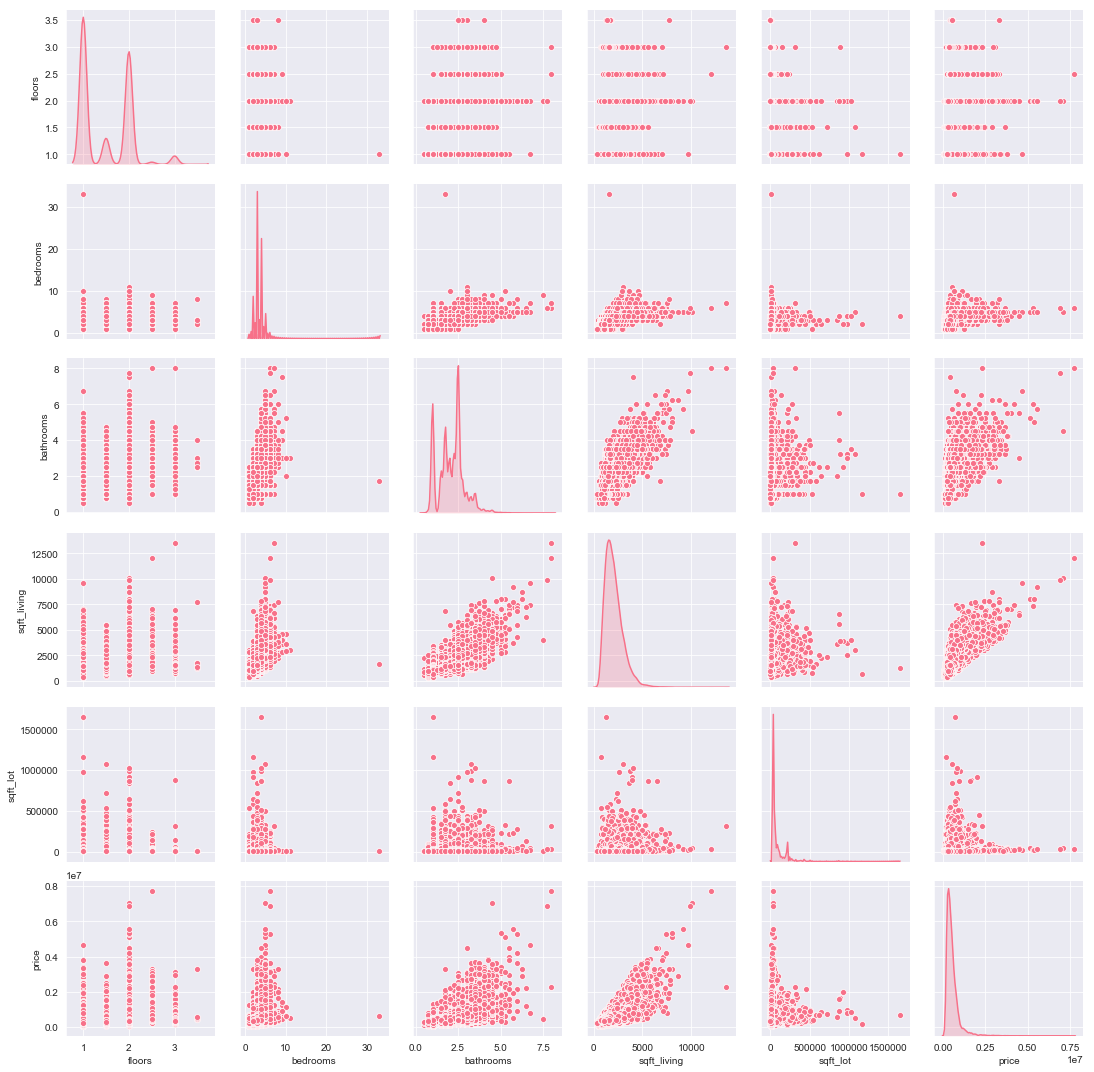

In [33]:
sns.pairplot(df[col1], diag_kind='kde')

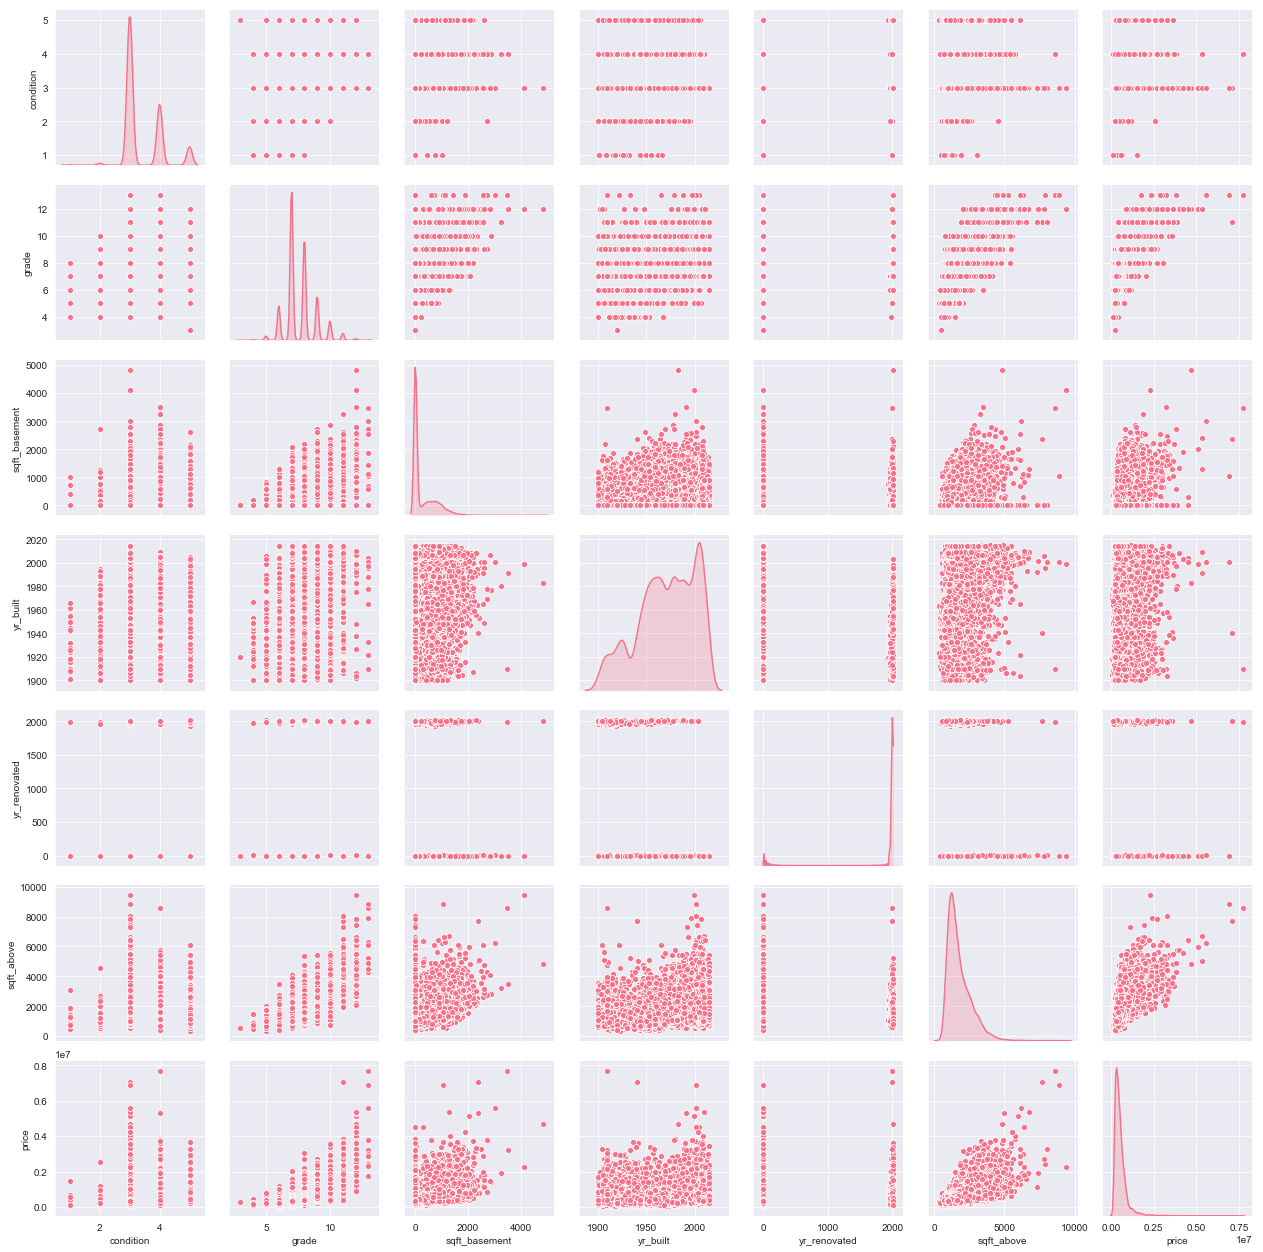

In [34]:
sns.pairplot(df[col2], diag_kind='kde')

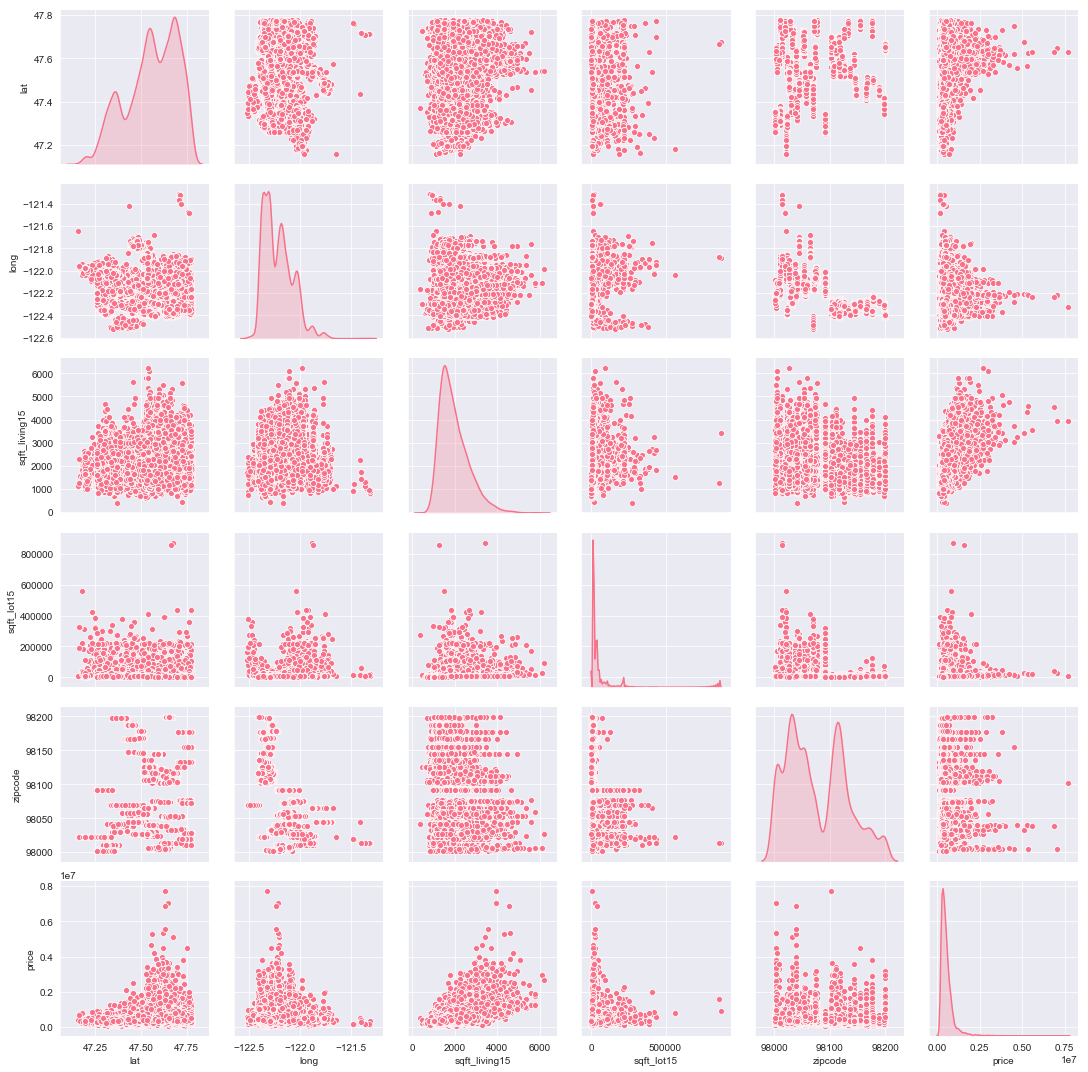

In [35]:
sns.pairplot(df[col3], diag_kind='kde')

### From these charts we can conclude that on first look, several data points may significantly effect your price point.
#### Table 1
- bathrooms
- sqft_living

As both of these items increase, we can see that the price increases with them. I'll demonstrate this in greater detail below.

#### Table 2
- sqft_above
- sqft_basement

The square footage of your home above ground seems to have a slight effect on your price. The square footage of your basement seems like it could potentially help, so let's take a better look at that information.

#### Table 3
- sqft_living15

The square footage of surrounding housing makes sense because if your neighbors have larger homes, chances are your house is also larger. Let's test this though.



## Let's Do Math!

In [36]:
pd.unique(df['bedrooms'])

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [37]:
np.max(df['price'])

7700000

In [38]:
bins = [1, 2, 4, 6, 33]
labels = ['single', 'few', 'family', 'many'] 
bedroom_bins = pd.cut(df['bedrooms'], bins, labels)

In [39]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
log_price = np.log(df['price'])
log_sqft_living = np.log(df['sqft_living'])
log_bedrooms = np.log(df['bedrooms'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_bathrooms = np.log(df['bathrooms'])
log_sqft_basement = np.log(df['sqft_basement'])
log_sqft_above = np.log(df['sqft_above'])

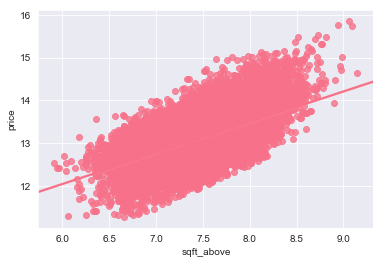

In [41]:
sns.regplot(x=log_sqft_above, y=log_price)

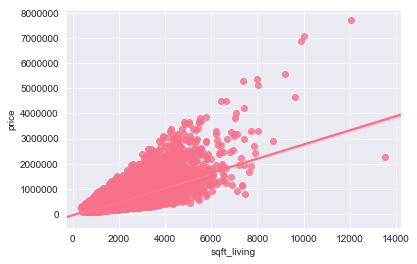

In [42]:
sns.regplot(x=df['sqft_living'], y=df['price'])

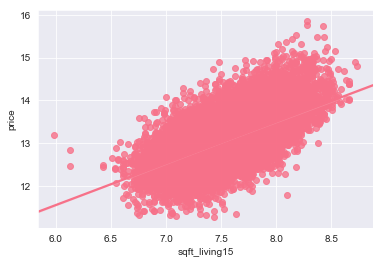

In [43]:
sns.regplot(x=log_sqft_living15, y=log_price)

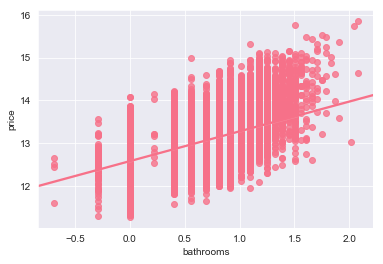

In [44]:
sns.regplot(x=log_bathrooms, y=log_price)

In [45]:
corr_num = df_num.corr()

In [46]:
corr_num

,price,bedrooms,bathrooms,view,floors,sqft_living,sqft_above,sqft_lot,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.393497,0.256804,0.701917,0.605368,0.089876,0.321116,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.078354,0.177944,0.578212,0.479386,0.032471,0.297240,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.186016,0.502582,0.755758,0.686668,0.088373,0.278493,0.569884,0.088303
view,0.393497,0.078354,0.186016,1.000000,0.028414,0.281715,0.166017,0.075054,0.270638,0.278928,0.073083
floors,0.256804,0.177944,0.502582,0.028414,1.000000,0.353953,0.523989,-0.004814,-0.241871,0.280102,-0.010722
sqft_living,0.701917,0.578212,0.755758,0.281715,0.353953,1.000000,0.876448,0.173453,0.428672,0.756402,0.184342
sqft_above,0.605368,0.479386,0.686668,0.166017,0.523989,0.876448,1.000000,0.184139,-0.051178,0.731767,0.195077
sqft_lot,0.089876,0.032471,0.088373,0.075054,-0.004814,0.173453,0.184139,1.000000,0.015032,0.144763,0.718204
sqft_basement,0.321116,0.297240,0.278493,0.270638,-0.241871,0.428672,-0.051178,0.015032,1.000000,0.199292,0.015887
sqft_living15,0.585241,0.393406,0.569884,0.278928,0.280102,0.756402,0.731767,0.144763,0.199292,1.000000,0.183515


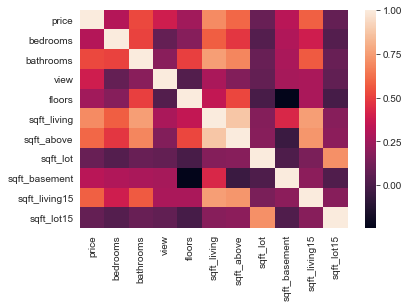

In [47]:
sns.heatmap(corr_num)

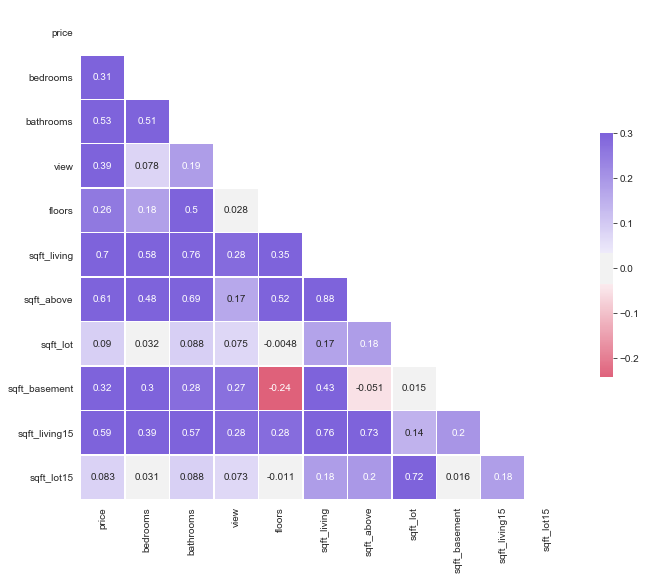

In [48]:
sns.set_style('whitegrid')
mask = np.zeros_like(corr_num, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(5, 272, sep=30, center='light', as_cmap=True)
# cmap = sns.color_palette('Paired')
sns.heatmap(corr_num, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

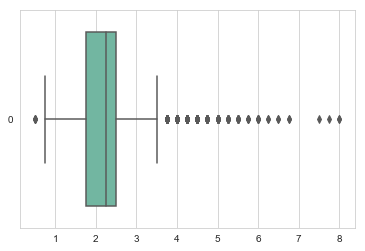

In [49]:
ax = sns.boxplot(data=df['bathrooms'], orient="h", palette="Set2")

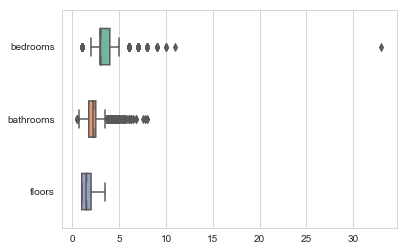

In [50]:
ax = sns.boxplot(data=df[['bedrooms', 'bathrooms', 'floors']], orient="h", palette="Set2", notch= True, width = .5)

Bedrooms has a huge outlier here, with 33 bedrooms, so I'm going to delete it. The reason I'm choosing to do this is because a 33 bedroom house is absurd. I don't believe it was a typo because it also has 8 bathrooms. The pricing of the house is also equivalent to that of a 3 bedroom house, so I think it is all around faulty data.

In [51]:
bednum = df[df['bedrooms'] == 33 ].index
 
# Delete these row indexes from dataFrame
df.drop(bednum, inplace=True)

While other columns also have many outlier, I decided to keep those as they seemed important to keeping the integrity of the data set.

In [52]:
df.bedrooms.describe()

count    21596.000000
mean         3.371828
std          0.904114
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

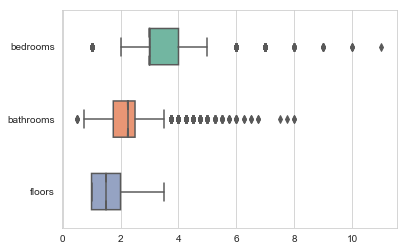

In [53]:
ax = sns.boxplot(data=df[['bedrooms', 'bathrooms', 'floors']], orient="h", palette="Set2", notch= True, width = .5)

In the next portion, I picked the variables that seemed to have the most impact on the price. These are the columns of which I took the log.

In [82]:
colvar = [['price', 'sqft_living', 'bedrooms', 'sqft_living15', 'bathrooms', 'sqft_basement']]

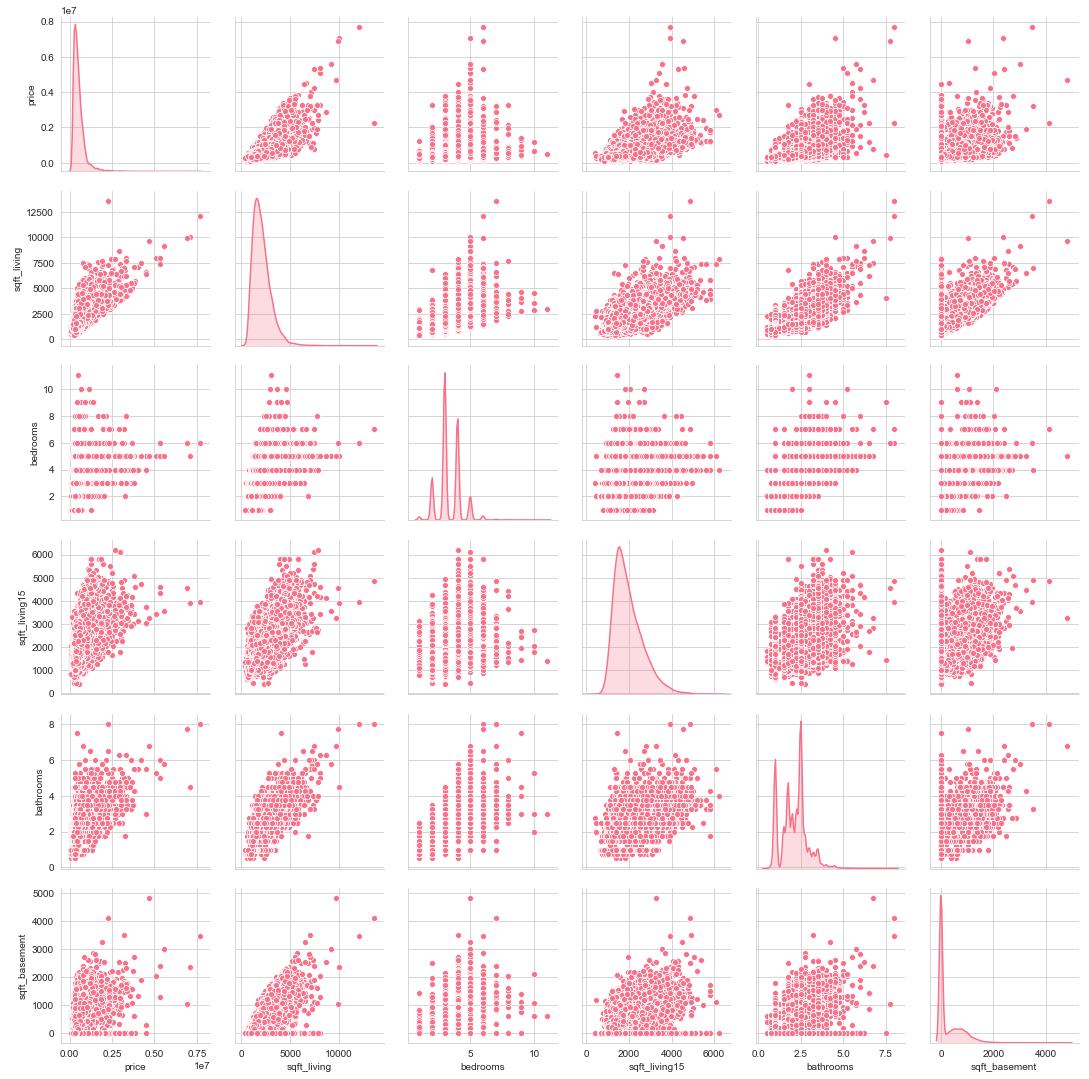

In [55]:
sns.pairplot(df[colvar], diag_kind='kde')

Next I'm going to take the corrlation of the data set again, this time with the log variables added in.

In [56]:
corr_log = df.corr()

In [57]:
corr_log

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.393502,0.605392,0.321112,0.585267,0.082849
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,0.080741,0.492543,0.303528,0.404532,0.031892
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.186011,0.686664,0.278512,0.569878,0.088297
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.281710,0.876448,0.428695,0.756400,0.184337
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.075052,0.184134,0.015039,0.144756,0.718203
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.028401,0.523970,-0.241850,0.280072,-0.010734
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,1.000000,0.166007,0.270651,0.278921,0.073079
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,0.166007,1.000000,-0.051151,0.731756,0.195069
sqft_basement,0.321112,0.303528,0.278512,0.428695,0.015039,-0.241850,0.270651,-0.051151,1.000000,0.199328,0.015896
sqft_living15,0.585267,0.404532,0.569878,0.756400,0.144756,0.280072,0.278921,0.731756,0.199328,1.000000,0.183506


Here is another heatmap with out new variables.

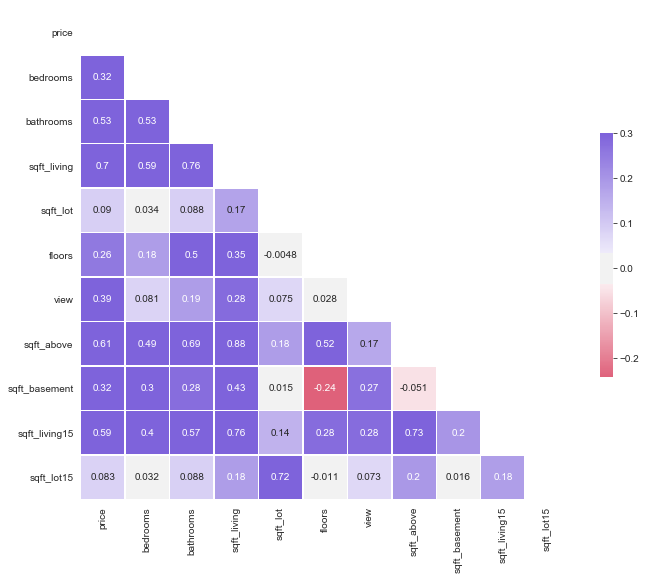

In [58]:
sns.set_style('whitegrid')
mask = np.zeros_like(corr_log, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(5, 272, sep=30, center='light', as_cmap=True)
# cmap = sns.color_palette('Paired')
sns.heatmap(corr_log, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Here we can see that the ones with the most effect after taking the log are the sqft_living and the bathrooms. Also sqft_living 15 but we can't change the neighbors houses!

## Next Steps

In this next section, I am going to try to find the variable that has the most effect on the price and test it's R2 value.

In [59]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [116]:
X = df_num
y = pd.DataFrame(df_num, columns= ['price'])

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  bathrooms                      with p-value 0.0
Add  price                          with p-value 0.0
Add  floors                         with p-value 0.0
Add  sqft_living15                  with p-value 3.24882e-88
Add  view                           with p-value 1.15813e-116
Add  sqft_above                     with p-value 0.0
Add  sqft_living                    with p-value 4.68934e-271
Add  bedrooms                       with p-value 1.75653e-96
Add  sqft_lot                       with p-value 1.44278e-19
Drop sqft_above                     with p-value 0.0935533
Add  sqft_lot15                     with p-value 3.62015e-91
Add  sqft_basement                  with p-value 2.80244e-21
Add  sqft_above                     with p-value 6.54177e-35
resulting features:
['bathrooms', 'price', 'floors', 'sqft_living15', 'view', 'sqft_living', 'bedrooms', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above']


In [117]:
X_fin = X[['price', 'bathrooms', 'sqft_living', 'bedrooms', 'sqft_living15', 'sqft_basement']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.074e+33
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:16:23   Log-Likelihood:             4.3988e+05
No. Observations:               21597   AIC:                        -8.798e+05
Df Residuals:                   21590   BIC:                        -8.797e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.366e-11   1.05e-11     -4.165      0.000   -6.42e-11   -2.31e-11
price             1.0000   9.18e-18   1.09e+17      0.000       1.000       1.000
bathrooms     -1.455e-11   4.74e-12     -3.073      0.002   -2.38e-11   -5.27e-12
sqft_living    -3.02e-14   6.05e-15     -4.991      0.000   -4.21e-14   -1.83e-14
bedrooms      -3.638e-12    3.2e-12     -1.136      0.256   -9.92e-12    2.64e-12
sqft_living15          0   5.41e-15          0      1.000   -1.06e-14    1.06e-14
sqft_basement  4.974e-14    6.1e-15      8.159      0.000    3.78e-14    6.17e-14
==============================================================================
Omnibus:                    19489.861   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1227449.833
Skew:                          -4.136   Prob(JB):                         0.00
Kurtosis:                      38.994   Cond. No.                     2.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [119]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
yhat = linreg.predict(X[selected_columns])

In [121]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [122]:
r_squared

price    1.0
dtype: float64

In [123]:
adjusted_r_squared

price    1.0
dtype: float64

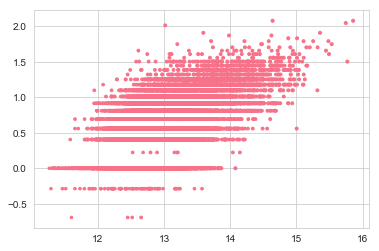

In [124]:
plt.scatter(log_price, log_bathrooms, log_sqft_living)

## Simple and Multiple Linear Regression

In [91]:
reg = linear_model.LinearRegression()
reg.fit(df[['sqft_living']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
reg.predict([[3000]])

array([798600.1508824])

In [93]:
reg.fit(df[['sqft_living', 'bathrooms', 'grade']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
reg.coef_

array([   203.16503658, -38357.50160684, 104623.84505781])

In [95]:
reg.intercept_

-602394.8412994952

I'm going to try another way, and see what happens!

In [96]:
X= df[['bathrooms', 'sqft_living', 'grade']]
y= df[['price']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [98]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_pred = reg.predict(X_test)

In [100]:
score = r2_score(y_test, y_pred)

In [101]:
score

0.5401413039024374

This r2 value isn't great! This lets me know that in future work, I will have to fix my data better before calculating this score.